# Simple Regression

### import packages

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

### import CSV file

In [56]:
df = pd.read_csv('Desktop/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### show describe

In [57]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### feature selection

In [58]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


### show histogram for features

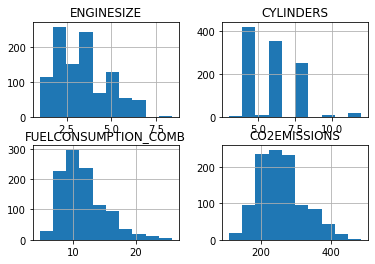

In [59]:
cdf.hist()
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXcAAAEICAYAAACktLTqAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAAlYUlEQVR4nO3df5xcVX3/8dcbCIKABAhdMQSXlmi/UNqKEYPYditQ+aXBShGkQBCbbyu0IGkhKgrWHwX6BRRFWyw0oBREQEClDw2RLcUHoASRnyIRAyQmRH4kYQMqgc/3j3Mm3Exmdmdmd3Zm7r6fj8c8dubcM/eee++5n7333DPnKiIwM7Ny2aTTBTAzs7Hn4G5mVkIO7mZmJeTgbmZWQg7uZmYl5OBuZlZCDu5mZiXk4D4MSUskvSBpqPD6oqTZkkLSaVX5l0oaKHyeLukqSb+StEbSI5K+IGnnPH1A0tJC/kFJv5Y0rZC2v6QlI5UpT9tc0nm5HEM57+eqvrt/fv9A1TyGJP1G0suFsr1cI88+Y7uVrZtJer+ku/K+Xy7pvyXdLGlhVb435Dq+Zz4+bqszv0FJH8zvB/Jx9KWqPLdJmp3fz5b0UqH+/ULSf0p6QyF/f55PdV19X54+X9Jvc9ozkhZI+v3C94c9bnqVg/vI3hURWxdeJ+X0Z4DTJG1T60uSdgPuBH4JvCkiXgPsC/wcePswy1sLfLzFMn0EmAHsDWwDDAB315pBROxRnAfwWuBR4FOFbL+sWs7WEXH7CGWzkpB0KvA54LNAH7AL8CXgPuC1kv4m5xPwFeD8iLivycWsBY6R1D9MnttzHd0W2B94AVgk6Q+q8k2uqqtfL0w7N89jKrAMuKQwreHjppc4uLfuIeB24NQ6088CfhARp0bEUoCIWBkRn4uIq4aZ74XAUZJ+r4UyvQX4ZkT8MpIlEXF5g9/9D+AJ4JMtLNdKRtK2wD8DJ0bEdRGxNiJejIhvRcSHgQ8AZ0t6HTAH2A74TAuLWgXMB84cKWNEvBQRP4+IDwH/QzrGmhIRLwBXA39cSB7NcdO1HNxH5+PAKZK2rzFtf+DaFua5jHQW1EqQvQM4VdKH8uWxGvmSpH8A3ga8PyJebmG5Vj77AFsA36w1MSLuJAXlr5KC+gci4sUWl/UZ4L2S3tjEd64D/qTZBUnaCjgKWFxIbum46XYO7iO7XtKqwutvKhMi4h5gAXB6je9NAVZUPkg6KX9/SNJXRljmvwDvkrRHk2X6F+Ac4GjgLmCZpOOGW5CkmaTL7iMi4qmqya+rWs6qfHBY+e0APBUR64bJcwawG/DViLir1QVFxArg30hXCo36JVB9UvVUVV39P4Vp/yhpFfAcqVn0mMK0po+bXuDgPrLDImJy4VUdmD8B/J2kvqr0p4GdKh8i4osRMZnUhjlpuAVGxK+AL1K/stcsU75svSgi9gUmk86ILq2q5OtJmgJ8A/hIRNxRI8svq5YzOSLWDld2K42ngSmSNquXITdx/AJ4YAyWdw7wTkl/1GD+qaT7XkVTqurqQ4Vp/y8ff/2kNvv1VwnNHje9wsF9lCLip6RLxI9VTVoI/OUoZv2vwJ8Db26xXC9ExEXAs8Du1dMlbQL8F+m+wBdGUU4rp9uB3wCHjcfCIuJp0onPp0bIWvEe4H9bWM7jwMnA5yVtWWP6sMdNL3FwHxufBI4n/devOAv4E0nnS5oK68+UGzobiIhVwHnAaSNkXU/SKbl72ZaSNsuXltsAP66R/SxgGvDBRudvE0dErCZdlV4k6TBJr5Y0SdJBks5tYBaStEXx1cB3zifd+6l3pbmppF0lfYHUo6Wlm/8RsYDUrDMnz7eZ46ZnOLiP7FtVfWc3usEUEb8g3VjaqpD2M+CtwM7ATyQ9B/yAVKlG6upY8XngpSbK9DzpH8IK4CngROC9EfFojXmcAfwusKJG/+Bdcp7X1Zj23gbLbj0uIs4j9QY7A/gVqTfVScD1DXz9baTmj/Wv4Zp48vLWAOeycVv6PpKGgDXAIPAa4C01ul2uqqqr9XqyQboyPk3Sq2juuOkZ8sM6zMzKx2fuZmYl5OBuZlZCDu5mZiXk4G5mVkLD3r0eL1OmTIn+/v5OF4O1a9ey1Va98wPMXisvtLfMixYteioidmzLzMdYt9T5im6sSy7TyIar810R3Pv7+7nrrpZ/vTxmBgcHGRgY6HQxGtZr5YX2llnSY22ZcRt0S52v6Ma65DKNbLg672YZM7MScnA3MyshB3czsxLqijb3sdY/7ztNf2fJ2Ye0oSRm48N13qr5zN2sjjxQ1Y8lfTt/3lXSnZIWS/q6pM1z+qvy58V5en9HC26Gg7vZcE4mPU6x4hzggojYjTQk7Ak5/QTg2Zx+Qc5n1lEO7mY1SNoZOIT0bNnKQ6DfAVyTs1zGK2Odz8qfydP3K8uj2qx3lbLN3WwMfI40lv42+fMOwKrCY+eWkp4GRP77BEBErJO0Ouff4LGFkuaQxxDv6+tjcHBwzAo7d8/hnoZXW3H5Q0NDY1qeseAyjY6D+yi0chMLfCOr20k6FFgZEYskDYzVfCPiYuBigBkzZsRY/hhmdis3VI9+Zfnd9uMccJlGy8HdbGP7Au+WdDCwBenhEJ8HJkvaLJ+97wwsy/mXkZ5qtTQ/kGJb0jNIzTrGbe5mVSLiIxGxc0T0A0cC34+Io4FbgMNztuOAG/L7G/Nn8vTvh5+CYx3m4G7WuNOBUyUtJrWpX5LTLwF2yOmnAvM6VD6z9dwsYzaMiBgkPbeT/EzNvWvk+TXwV+NaMLMR+MzdzKyEHNzNzErIwd3MrIQc3M3MSsg3VM2sKR6Bsjf4zN3MrIQc3M3MSmjE4C5pmqRbJD0o6QFJJ+f07SUtkPRI/rtdTpekC/PY1vdK2qvdK2FmZhtq5Mx9HTA3InYHZgInStqd9Cu8hRExHVjIK7/KOwiYnl9zgC+PeanNzGxYIwb3iFgeEXfn98+RHl4wlQ3HsK4e2/rySO4gDba001gX3MzM6muqt0x+fNibgDuBvohYnietAPry+/VjW2eVca+XF9K6cmzrZsdqbmU5lWWNhV4aW7qiF8ts1osaDu6StgauBU6JiDXFB81EREhqahS8bhzbutmxmltZTmVZY6GXxpau6MUym/WihnrLSJpECuxXRMR1OfnJSnNL/rsyp1fGtq4ojnttZmbjoJHeMiINafpQRJxfmFQcw7p6bOtjc6+ZmcDqQvONmZmNg0aaZfYFjgHuk3RPTvsocDZwtaQTgMeAI/K0m4CDgcXA88DxY1lgMzMb2YjBPSJuA+o9yX2/GvkDOHGU5TIzs1HwL1TNzErIwd3MrIQc3M3MSsjB3cyshBzczcxKyMHdzKyEHNzNzErIwd3MrIQc3M3MSsjB3cyshJoaz93MbLzct2x108NqLzn7kDaVpvc4uGf9877D3D3XtTxGu5lZN3GzjJlZCTm4m5mVkIO7mVkJObibmZWQg7uZWQk5uJuZlZCDu1kVSdMk3SLpQUkPSDo5p28vaYGkR/Lf7XK6JF0oabGkeyXt1dk1MHM/957RX6P//Uj98v2DjpatA+ZGxN2StgEWSVoAzAYWRsTZkuYB84DTgYOA6fn1VuDL+a9Zx/jM3axKRCyPiLvz++eAh4CpwCzgspztMuCw/H4WcHkkdwCTJe00vqU225DP3M2GIakfeBNwJ9AXEcvzpBVAX34/FXii8LWlOW15IQ1Jc4A5AH19fQwODo5ZOefuua7p7xSXPzQ01HB5RrusRvVt2fyyxnKb1tLMduo0B3ezOiRtDVwLnBIRayStnxYRISmamV9EXAxcDDBjxowYGBgYs7K2MmzGkqNfWf7g4CCNlme0y2rUF664gfPuay5EtbKcZjSznTrNzTJmNUiaRArsV0TEdTn5yUpzS/67MqcvA6YVvr5zTjPrmK4/c691I9GsnZRO0S8BHoqI8wuTbgSOA87Of28opJ8k6SrSjdTVheYbs47o+uBu1gH7AscA90m6J6d9lBTUr5Z0AvAYcESedhNwMLAYeB44flxLa1bDiMFd0qXAocDKiPiDnLY98HWgH1gCHBERz+Yzns+TKvrzwOxKrwOzXhERtwGqM3m/GvkDOLGthTJrUiNt7vOBA6vS5pH6+04HFubPsGF/3zmk/r5mZjbORgzuEXEr8ExVsvv7mpl1sVbb3EfV3xca7/PbSp/aVrXSr7YVrfSTrVWukcrbjf1xe6mfsFkvG/UN1Vb6++bvNdTndzwfezd3z3VN96ttRSt9cWtth5HK2+4+v63opX7CZr2s1X7u7u9rZtbFWg3ulf6+sHF/32PzKHkzcX9fM7OOaKQr5JXAADBF0lLgTNzf18ysq40Y3CPiqDqT3N/XzKxLeWwZM7MScnA3MyshB3czsxJycDczKyEHdzOzEvKQvx3gMerNrN185m5mVkIO7mZmJeTgbmZWQg7uZmYl5BuqJdbKjdslZx/ShpKY2XjzmbuZWQn5zN020Go3TZ/xm3UXn7mbmZWQg7uZWQk5uJuZlZCDu5lZCTm4m5mVkIO7mVkJObibmZWQg7uZWQk5uJuZlZCDu5lZCTm4m5mVkIO7mVkJeeAwM7NxMp7DcLflzF3SgZIelrRY0rx2LMOs27jeWzcZ8zN3SZsCFwEHAEuBH0m6MSIeHOtlmXWLXqz3xbPIuXuuY3aLwz2XQaNn1MXt1O3DXLejWWZvYHFEPAog6SpgFtC1ldw6o2RPihqzet/qmPpmRYqIsZ2hdDhwYER8MH8+BnhrRJxUlW8OMCd/fCPw8JgWpDVTgKc6XYgm9Fp5ob1lfn1E7NimeQ+rkXrfpXW+ohvrkss0srp1vmM3VCPiYuDiTi2/Fkl3RcSMTpejUb1WXujNMo+VbqzzFd24X1ym0WnHDdVlwLTC551zmlmZud5bV2lHcP8RMF3SrpI2B44EbmzDcsy6ieu9dZUxb5aJiHWSTgK+C2wKXBoRD4z1ctqkKy+Zh9Fr5YXeLPOIerzeQ3fuF5dpFMb8hqqZmXWehx8wMyshB3czsxKaUMFd0jRJt0h6UNIDkk6ukWdA0mpJ9+TXJzpR1qoyLZF0Xy7PXTWmS9KF+Wfv90raqxPlLJTnjYXtd4+kNZJOqcrTddt5Iui2utQtdUXSpZJWSrq/kLa9pAWSHsl/t6vz3eNynkckHTfWZWtZREyYF7ATsFd+vw3wM2D3qjwDwLc7XdaqMi0Bpgwz/WDgvwEBM4E7O13mQtk2BVaQfmzR1dt5Iry6uS51sq4AfwrsBdxfSDsXmJffzwPOqfG97YFH89/t8vvtOr2fI2JinblHxPKIuDu/fw54CJja2VKNiVnA5ZHcAUyWtFOnC5XtB/w8Ih7rdEGsIZ2sSx2rKxFxK/BMVfIs4LL8/jLgsBpffSewICKeiYhngQXAge0qZzMmVHAvktQPvAm4s8bkfST9RNJ/S9pjfEtWUwDfk7Qo/4S92lTgicLnpXTPP60jgSvrTOu27TwRdHNd6ra60hcRy/P7FUBfjTxde+xNyPHcJW0NXAucEhFrqibfTbosHJJ0MHA9MH2ci1jt7RGxTNLvAAsk/TSfaXS1/GOedwMfqTG5G7fzRNCVdanb60pEhKSe6jc+4c7cJU0iBfYrIuK66ukRsSYihvL7m4BJkqaMczGry7Qs/10JfJM0AmFRt/70/SDg7oh4snpCN27niaCL61I31pUnK01S+e/KGnm69dibWMFdkoBLgIci4vw6eV6b8yFpb9I2enr8SrlRebaStE3lPfAXwP1V2W4Ejs09HWYCqwuXk510FHUus7ttO08EuS59QNJdkoaAjwLvk/T2PH134I+AyyU9J2kR8FKlLkl6g6QbJP1K0jOSvivpjYX5nyXpRUlDhdeqwvTIPVI2K6RNkrSSdDZ+ZU4blPTBQp7PSvpFnt+TwI7kuiJpD0nfy+VZlZubDs7TBiQtrdoGh0r6oaS1kp6WdIWknQtZJudynkY6riq9X35KuoJA0uTcu2YF6RerH5D0ydyb5i9Iv1LuvPG6c0u6S/8CMFR4vR9YWiPvIPDB/P4s4MWq760q5A1gtzrL3IkUzJcDzwGP5fz3Affk1yWk/8i/BR4Hvkcag/snwB3Ad/J39i7Md7e06dZ/3iN/7xlgFbAIODhPmw3cVmd77J/fz8/LmFWV54Kc/nguzzLg5bwNXiC19R0KHJ3L/3LhtX57VS8vf94ZuIJ0kKwFfggcWrX8yrbapJD2aWB+A/t7MvA88PM8/yXAD4CP5ekn5f3xPPASsDqXZ+fCPGbnMlxQNe9ZOX1+/tyfP1fW+UngS8Ck8arfvfDK++7FvC8eBD4OvCvX3TOAZ4HPAP9B6vXxy7x/9snf3xs4gdQzZBLwKeCnhfmfBXxtmOUHaZjjdxXS3k3qtRbAtoXj/6vA35KC64qc5yekY+vswvcfBf4J2Dy/9iU1PUHqZbO0kPdwYA0p7mwJvBa4NG+Pa0hxYl2uj88BrwcWAo8Av66UmxT0HyX1jtmE9E9yObAYOL7T+3n9+o5jxVpCIbjU2viF9EE2DO4jVZiNgnuugEuA/wL6c9o04PPAH+bPX8g7bh/S/Yc9SEHuhsJ85pMC4PcKadXBfbgKNpvGgvvDwLWF6ZuRgvliYHb1vHKl+nvSwbdd4Xv1tmlxeZVt85+5gm9JOsteAxxetW2fBt5fFSDmN7C/bySd6bwlr8u2wInACQ0caNsV1ndx3g6bFeZ9Xd5e8/Pn/lzWzfLn3wF+TLqn0vGDrBteefsPAX9VZ/pXgZtqpH8ZuLXOd7bP232H/PksRj5WzwC+UUi7BvhY1fE0yCvH/xeBz9WZ35Q8z8l1pq8/FkhdOx8DTqvKswnpSvifC3XuNuBbwJmFfEuBgfz+fuCwTu/TkV5lbpY5lfTf968jYglARDwRESdHxL2SpgMfAo6OiNsjYl2kgZ7eCxwo6R2FeV0G/KGkP6teSG772xX4SkT8Nr9+EBG3NVnebwFvL/xQ4kDgXtJZy0Yi4mVSMNwS+L0ml/Vh0oF+QkSsiIgXIuJK0lnbeZXmkuxc4JPFS+mRSNqf9Li5WRHxo7xtV0fERRFxSZ7/ecCnI+K/8vJXAB/M5fpwYXYrSFcP78zz3h54G8OMuBipPXkBsHujZZ4A9gG2ILWz13IA8I0a6VcD+0rassa0PwVWREQzzWnXA3+amza2A/4EuGGY/HeQmhz/SdIMpccZVjxN+uf/NUmHSarVm6XijcAuVK1jPo6uJa1/0ceBU3J9q1Wmz0g6PseRrlTm4L4/cF3eebXsR/qv/sNiYkQ8Qdp5xZ39PPBZUvCr1kwFG86vSZX8yPz5WODyeplzsK0Ew0eaXNYBpKuE6m1zNekAeEMh7TrSGfbsJua/P/DDvC1rafZAu5y0PSBtnxuA39RbuKTXkf4Z3NFEmctuB+CpiFhXZ/oUUtNCteWkOLFBkMvt1BeRTqKKjsht35XXLVXTf006kXlfft2Y02qKiK+RrlDfCfwPsFLS6XlaAH9Outo7D1gu6dY6AbdyA7beOm5wgzYi7iGdIJxeI//fk5oQTwIeVPo170H11qFTxju4X1/Y6dc38b2RKkwtO1B7R1bUq8xQY2cD/w7sUr0Tm6xgI7mcdJYyGfgz0llOtZn5JtUKUlPKeyJidZPLGe5ArkyvCNJZzMeVuqs1opFtT508tbb9N4EBSdsy/D+9p/K2WUZq57+mwfJOBE8DU4a5AnuKdI+q2k6kezjPVhIk7Uhqp/9SvuIrujoiJhdef15jnpV/1sOewFRExBURsT/pPs7fAp+S9M48bWlEnBQRv0dqI19bZ56VR+PVW8daj877BPB31Sds+UrzsxHxZlJdvxr4Rp2z/I4Z7+B+WGGnH0a6eTGpRr5JpBs/FY1UmGpPU3tHVtSrzFBjZ0fEb0g3kD5VnXmECtboOpKbcnYktUF+OyJeqPG9O/I2mBIRMyPi5norOIzhDuTK9GK5biK1Of7fBuffyLanTp5a2/4F0o3tM0jtuz+oM98pETEZeDXp5m139FroDreTrnYOqzP9ZuCvaqQfAdweEc8D5KaU7wE3RkStK9lG/C9pP/eR2rcbEhEvRsQ3SM2Vf1Bj+hOkq4mNppHu0Sylah0lbUJqil1YY34/JV25fmyYMq0hXdVvRWqe7RqdbpZ5nHQ2sXUlIbfHvp5082M0bgbek3deLd8HpuVueOtJmkYaU2OjnU26ATkZ+Mt6C61RwR4nnfGvb8eW9GrSTb9a6/g1YC4NnNGMws3AX9bYNkeQeuD8rMZ3PkbqFfDqBue/d1UXs6KmDzTS9phL2j7Dyv8M5pOuctx3HshXd58ALsrNh6/O3RAPknQu8EngbZI+ozRg1jaS/p50dn06gKTXkP5h/iAi5o2iLEHqpfPu/L4uSbMlHZLLs0m+ct4DuFPSdrkL4m552hTgA9RojsvL+UfgDEnvl7SFpNeSega9htQzrZZPAseTjvtKmT4u6S2SNpe0BXAyqZdcNz3wvLPBPSIeJ/38/xxJW0t6FanXyYs01166ed5ZldemwPmknXaZpNcDSJoq6XxJfxgRPwP+DbhC0kxJmyr9rPla4OZaZ8S5vfJMCu1wDVSwO0ltivNy2bYCzgbuonZwv5DU5tzOXw1eQOo9cYlSf/MtJB1FCuD/VOuAi4hBUi+B46qn1ch7M6m98puS3ixps3xw/q2kD7R4oP0Pabt8YaTl53p0DKnpyn3ns4g4j9RGfgbwK9I/8pOA6yPiEeDtpH7uS0jNY+8F3lm4UnoPqffT8dqwL/suhcW8r2rakNKvYavL8kA09qSqNaSTisdJAfRc4O/yVe5vST2lbs757iddncyus/5fJ9WLD5PqxYOkDgn71rspHBG/IPUk2qqYTDrRe4rUXfQA4JDIP7TqGqPpatPMixpdIXP6NNKNtRWkjfVdCiM1Uruf+xDwO/FK96rqV6Ub1etIPUpWkHrO/JQUnF8dr3SDOp10Q7TSb/xcYIvC8ueTenVUd52qxMCtSL1pluRyrSD9GGNq4Tu75/V6itQH+xpgWr1lVG2f26jRFXKY7TzACF0h8+ddcjmfITUj/YiN+9lv0M0UeCuF/uUjlGNz0lnP4jz/x0jBe5dCnll5uWtzOa6s2i5115dCl0w27ue+ivTP4C3jVb/98qvbXn7MnplZCXW6zd3MzNrAwd1aIunoGm2rQ5IaaUc1szZzs4yZWQl1xXjuU6ZMif7+/k4Xo661a9ey1VZbjZyxhHpp3RctWvRUROzY6XI0opvrfC/t8/HUjdtluDo/YnDP/ThvBV6V818TEWdK2hW4ivQLrUXAMRHx29wN7XLgzaTuRu+LPLZLPf39/dx110bP6u0ag4ODDAwMdLoYHdFL6y6pZx7l1811vpf2+Xjqxu0yXJ1vpM39N8A7IuKPgD8mDao1EziHNBTrbqSfJp+Q858APJvTL8j5zMxsHI0Y3COpdM6flF8BvINXxu4oPjx2Fq88VPYaYL/irzPNzKz9Gmpzz7/4XEQax/wi0gMYVsUrI8wVHwq7/oGxEbFO0mryiHRV85wDzAHo6+tjcHBwVCvSTkNDQ11dvnaayOtu1ssaCu4R8RLwx3m0wm8Cvz/aBUfExaRHVDFjxozodFtW/7zv1J02d8+XOO+2tRulLzn7kHYWqSt0YzujddZwx0o9E+FY6TZN9XOPiFXALaSB/ycXhg8tPhR2/QNj8/Rt8fgeZmbjasTgLmnHfMaO0tNYDgAeIgX5w3O243jlaSrFh8oeDnw/3JnezGxcNdIssxNpZMVNSf8Mro6Ib0t6ELhK0qdJz6u8JOe/BPiqpMWkwaCOrDVTMzNrnxGDe0TcC7ypRvqjpKehV6f/mtqD/ptZF6nXdj53z3XMbqFd3bpLV/xC1czKzTdhx58HDjMzKyEHdzOzEnJwNzMrIQd3M7MScnA3MyshB3czsxJycDczKyEHdzOzEnJwN6siaZqkWyQ9KOkBSSfn9O0lLZD0SP67XU6XpAslLZZ0r6S9OrsGZg7uZrWsA+ZGxO7ATOBESbsD84CFETEdWJg/AxwETM+vOcCXx7/IZhtycDerEhHLI+Lu/P450iioU9nwKWPVTx+7PD+17A7ScNg7jW+pzTbksWXMhiGpnzRw3p1AX0Qsz5NWAH35/fqnj2WVJ5MtL6R13dPH5u65rmZ635b1p42nTm+far32VDIH91FoZTAk8IBIvULS1sC1wCkRsab4KOCICElNPaeg254+Vm/kx7l7ruO8+zofGpYcPdDpImyg155K5mYZsxokTSIF9isi4rqc/GSluSX/XZnT1z99LCs+mcysIxzczaoonaJfAjwUEecXJhWfMlb99LFjc6+ZmcDqQvONWUd0/tqrDVptLjHL9gWOAe6TdE9O+yhwNnC1pBOAx4Aj8rSbgIOBxcDzwPHjWlqzGkoZ3M1GIyJuA1Rn8n418gdwYlsLZdYkN8uYmZWQg7uZWQk5uJuZldCIwd3jbJiZ9Z5Gztw9zoaZWY8ZMbh7nA0zs97TVFfIXhlnY6zHxRjrsTZ6aXyKXhtPw8yShoN7L42zUW/MjFaN9Vgb3TZmxnB6bTwNM0sa6i3jcTbMzHpLI71lPM6GmVmPaaStweNsmJn1mBGDu8fZMDPrPf6FqplZCTm4m5mVkIO7mVkJObibmZWQg7uZWQk5uJuZlZCDu5lZCTm4m5mVkIO7mVkJObibmZWQg7uZWQk5uJuZlZCDu5lZCTm4m5mVkIO7mVkJObib1SDpUkkrJd1fSNte0gJJj+S/2+V0SbpQ0mJJ90raq3MlN0sc3M1qmw8cWJU2D1gYEdOBhfkzwEHA9PyaA3x5nMpoVpeDu1kNEXEr8ExV8izgsvz+MuCwQvrlkdwBTK48PN6sUxp5hqqZJX2Fh72vAPry+6nAE4V8S3PaBg+GlzSHdGZPX18fg4ODbS3sSObuua5met+W9aeNp05vn2pDQ0NdV6bhOLibtSAiQlI0+Z2LgYsBZsyYEQMDA+0oWsNmz/tOzfS5e67jvPs6HxqWHD3Q6SJsYHBwkE7vs2Z0fg9OQP11DqrhLDn7kDaUxJr0pKSdImJ5bnZZmdOXAdMK+XbOaeOmlTrV7XycjM6Ibe7uNWC23o3Acfn9ccANhfRjc/2fCawuNN+YdUQjN1Tn414DNsFIuhK4HXijpKWSTgDOBg6Q9Aiwf/4McBPwKLAY+ArwoQ4U2WwDIzbLRMStkvqrkmcBA/n9ZcAgcDqFXgPAHZImVy5jx6zEZuMgIo6qM2m/GnkDOLG9JTJrTqtt7qPqNQDt7Tkw1nf6u6H3QKfu0vdaDwGb2Fq991DGtvpR31BtpddA/l7beg7U6wXQqm7oPdCpngO91kPAzJJWI1bX9hooK/ccMLNmtPoLVfcaMDPrYiOeuedeAwPAFElLgTNJvQSuzj0IHgOOyNlvAg4m9Rp4Hji+DWU2M7MRNNJbxr0GzMx6jAcOMzMrIQd3M7MScnA3MyshB3czsxJycDczKyEHdzOzEnJwNzMrIQd3M7MScnA3MyshP2bPzCa8Rgbmm7vnug1GnO32gfl85m5mVkIO7mZmJeTgbmZWQg7uZmYl5BuqJeanN5lNXD5zNzMroa4/c2/1aeZmZhOZz9zNzEqo68/czSYaX63aWHBwtw1UB5bqX+XV4xuxNtF0e4cFN8uYmZWQz9xtTHT7WYzZRNOWM3dJB0p6WNJiSfPasQyzbuN6b91kzM/cJW0KXAQcACwFfiTpxoh4cKyXZb2tTGf7rvfWbdrRLLM3sDgiHgWQdBUwC3AltzJzvbcRjecJTTuC+1TgicLnpcBbqzNJmgPMyR+HJD3chrKMiX+AKcBTnS5HJ3TbuuucYSe/fpyKUcuI9b5X6ny37fNu0ant0mqd79gN1Yi4GLi4U8tvhqS7ImJGp8vRCRN53cdar9R57/Paem27tOOG6jJgWuHzzjnNrMxc762rtCO4/wiYLmlXSZsDRwI3tmE5Zt3E9d66ypg3y0TEOkknAd8FNgUujYgHxno546zrL6XbaCKve8NKVu+9z2vrqe2iiOh0GczMbIx5+AEzsxJycDczKyEH9yqSLpW0UtL9hbTtJS2Q9Ej+u10ny9gOkqZJukXSg5IekHRyTi/9uk8kze5nJRfmIRXulbRXZ9egvSRtKunHkr6dP+8q6c68/l/PN8uR9Kr8eXGe3t/Rgtfg4L6x+cCBVWnzgIURMR1YmD+XzTpgbkTsDswETpS0OxNj3SeSZvfzQcD0/JoDfHn8izyuTgYeKnw+B7ggInYDngVOyOknAM/m9Atyvu4SEX5VvYB+4P7C54eBnfL7nYCHO13GcdgGN5DGSZlw6z6RXiPtZ+DfgaMK+dfnK9uL9NuEhcA7gG8DIv0idbM8fR/gu/n9d4F98vvNcj51eh2KL5+5N6YvIpbn9yuAvk4Wpt3yJeabgDuZYOs+kTS4n2sNqzB1vMo4zj4HnAa8nD/vAKyKiHX5c3Hd12+XPH11zt81HNybFOlfdWn7j0raGrgWOCUi1hSnlX3dJxLv5w1JOhRYGRGLOl2WseLg3pgnJe0EkP+u7HB52kLSJNIBf0VEXJeTJ8S6TyRN7ueJMqzCvsC7JS0BriI1zXwemCyp8mPP4rqv3y55+rbA0+NZ4JE4uDfmRuC4/P44UjtlqUgScAnwUEScX5hU+nWfSFrYzzcCx+ZeMzOB1YXmm9KIiI9ExM4R0U8aOuL7EXE0cAtweM5WvV0q2+vwnL+rrnb8C9Uqkq4EBkjDez4JnAlcD1wN7AI8BhwREc90qIhtIentwP8C9/FKm+NHSe2xpV73iaTZ/Zz/GXyR1IPseeD4iLhr3As+jiQNAP8YEYdK+l3Smfz2wI+Bv46I30jaAvgq6Z7FM8CRkcfy7xYO7mZmJeRmGTOzEnJwNzMrIQd3M7MScnA3MyshB3czsxJycDczKyEHdzOzEvr/0+baQ/UlwJ0AAAAASUVORK5CYII=

### show scatter plot for x=features and y =emmisions

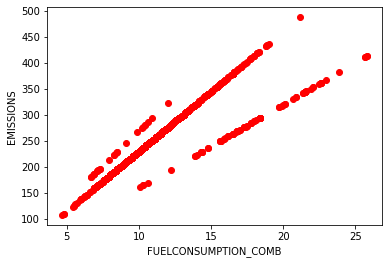

In [60]:
plt.scatter(cdf.FUELCONSUMPTION_COMB , cdf.CO2EMISSIONS, color='red')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('EMISSIONS')
plt.show()

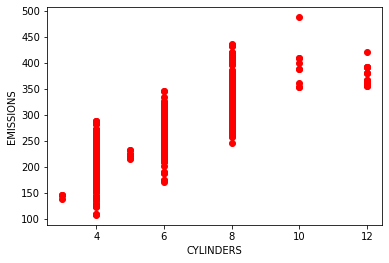

In [61]:
plt.scatter(cdf.CYLINDERS , cdf.CO2EMISSIONS, color='red')
plt.xlabel('CYLINDERS')
plt.ylabel('EMISSIONS')
plt.show()

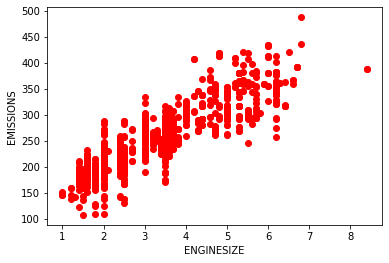

In [62]:
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS, color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('EMISSIONS')
plt.show()

### make train and test data

In [63]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### show train and test data with scatter plot

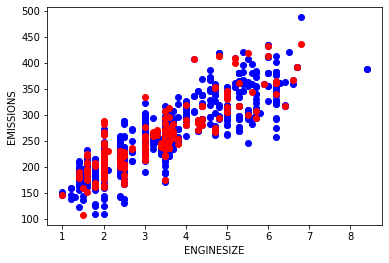

In [68]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS, color='blue')
plt.scatter(test.ENGINESIZE , test.CO2EMISSIONS, color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('EMISSIONS')
plt.show()

### modeling

In [65]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

print(f'Coefficient: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

Coefficient: [[38.87242809]]
Intercept: [125.91977465]


### plot output

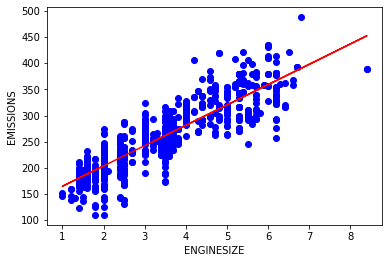

In [66]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS, color='blue')
plt.plot(train_x , regr.coef_[0][0]*train_x + regr.intercept_[0] ,'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('EMISSIONS')
plt.show()

### evaluation

In [67]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(train[['ENGINESIZE']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print('R2-score %.2f' %r2_score(test_y, test_y_))

R2-score 0.77
